In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
% matplotlib inline 
# Necessary to display plots in notebook
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as stats # Stats API 
import matplotlib.pyplot as plt # Plotting API
import seaborn as sns 
sns.set(style='whitegrid', palette='colorblind')
from IPython.core.display import display, HTML # Allows to print HTML tables
import warnings # Necessary to ignore warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['abalone_original.csv']


## Contents

1. [Introduction](#Introduction)
2. [Data Pre-Processing](#Data-Pre-Processing)
3. [Single Variable Analysis](#Single-Variable-Analysis)
    1. [Sex](#Sex)
    2. [Length](#Length)
    3. [Diameter](#Diameter)
    4. [Height](#Height)
    5. [Weights](#Weights)
    6. [Rings](#Rings)
4. [Pairwise Analysis](#Pairwise-Analysis)
5. [Summary](#Summary)

## [Introduction](#Contents)

It is important to know Abalone is a common name for any group of small sea snails to very large sea snails, as such we should expect diversity in their sizes and weights, unlike looking at single species of Abalone. 

The need is to predict the age of abalone accurately as telling the age by cutting the shell through the cone, staining it, and counting the number of rings through a microscope is inefficient process [1], so to predicting age using other factors like weight or height that can be easily measured would expedite the process. 

We know as abalone grows it adds rings, and as it add new layers to shell it increases the shell weight, and shell diameter. You can see that in image below:

![Growth Rings](https://www.marinebio.net/marinescience/06future/abimg/ab3686.jpg)


**Reference**

[1] UCI Machine Learning Repository: Abalone Data Set. 
    http://archive.ics.uci.edu/ml/datasets/Abalone


NOTE: This is a problem about Abalone...but not really. We should be able to use common knowledge (aka no complex domain knowledge required) to work with the data in this problem to find features that are important predictors for linear regression or other regression learning techniques.


### Data Dictionary
```
Description of fields in abalone data.

Name            Data Type    Meas.    Description
----            ---------    -----    -----------
Sex             nominal               M, F, and I (infant)
Length          continuous    mm      Longest shell measurement
Diameter        continuous    mm      perpendicular to length
Height          continuous    mm      with meat in shell
Whole weight    continuous    grams   whole abalone
Shucked weight  continuous    grams   weight of meat
Viscera weight  continuous    grams   gut weight (after bleeding)
Shell weight    continuous    grams   after being dried
Rings           integer               +1.5 gives the age in years
```

The target variable is Rings because it is a predictor of age. We can take this as our problem, "How do we estimate the age of an abalone from the available data?"

At a high level you have:

1. Question/Problem
2. ETL
3. EDA
4. Statistical and Mathematical Modeling.

Our focus is on properly doing EDA and with proper visualization techniques.

**Let's Begin**

## [Data Pre-Processing](#Contents)

From the data dictionary description above, we have good sense about what data dictionary is, and range of values we can expect, type of variable and the measurement units. 

We also know the target variable is `Rings`, which is predictor of age, now let's first explore the data after importing it into data frame.

In [2]:
df = pd.read_csv("../input/abalone_original.csv")
df.head()

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


Now we need to check for data types and see if data type matches with what we expect ?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
sex               4177 non-null object
length            4177 non-null int64
diameter          4177 non-null int64
height            4177 non-null int64
whole-weight      4177 non-null float64
shucked-weight    4177 non-null float64
viscera-weight    4177 non-null float64
shell-weight      4177 non-null float64
rings             4177 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB


Using `info` we can see total records are 4177, and counts of variables equals to total counts so we don't expect any missing values, or NA's, in addition we can see the data type was imported as we expected, with sex as categorical type, length, diameter, height, whole weight, shucked weight, viscera weight, and rings as numerical. 

One thing we can notice is `rings` is float type instead of integer, and length, diameter, and height should be  imported as float type not integer.

In [4]:
df['rings'] = df['rings'].astype('int32')
float_cols = ['length', 'diameter', 'height', 'whole-weight', 'shucked-weight', 'viscera-weight', 'shell-weight']
for col in float_cols:
    df[col] = df[col].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
sex               4177 non-null object
length            4177 non-null float32
diameter          4177 non-null float32
height            4177 non-null float32
whole-weight      4177 non-null float32
shucked-weight    4177 non-null float32
viscera-weight    4177 non-null float32
shell-weight      4177 non-null float32
rings             4177 non-null int32
dtypes: float32(7), int32(1), object(1)
memory usage: 163.2+ KB


Now, it matches exact data type as described in the data description from UCI ML repository.

## [Single Variable Analysis](#Contents)

### [Sex](#Contents)

From the initial data description fields we know sex is categorized into Male, Female which makes sense, while Infant seems misclassified or was classified may be due to it's was hard to tell the sex at the time of observation since Abalone was Infant. 

Let's first confirm the categories of `Sex`, we know it is 3, and which is the most frequent `Sex` found in this data set.

In [5]:
df.sex.describe()

count     4177
unique       3
top          M
freq      1528
Name: sex, dtype: object

We can confirm, sex only has 3 categories, mainly - Male, Female and Infant, with Male being the most frequent of them. Let's see their density, to understand by how much is Male greater than Female and Infant in this dataset.

In [6]:
df.sex.value_counts(normalize=True).sort_index()

F    0.312904
I    0.321283
M    0.365813
Name: sex, dtype: float64

So, their is significant more males than other two categories, let's visualize since Female and Infant are really close by using relative density to get a sense of their differences.

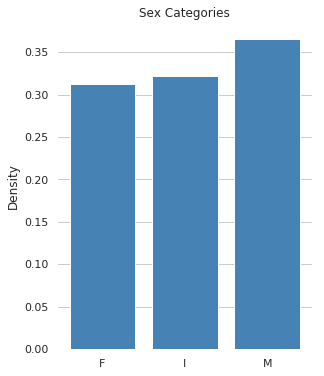

In [7]:
df_sex_category = df.sex.value_counts(normalize=True).sort_index()
x = range(len(df_sex_category))
figure = plt.figure(figsize=(10, 6))
axes1 = figure.add_subplot(1, 2, 1)
axes1.bar(x, df_sex_category, color="steelblue",align="center")
axes1.set_xticks(x)
# Set x axis tick labels
axes1.set_xticklabels(df_sex_category.axes[0])
# Set x and y axis chart label
axes1.set_title("Sex Categories")
axes1.set_ylabel("Density")
axes1.xaxis.grid(False)
# Remove all of the axis tick marks
axes1.tick_params(bottom=False, top=False, left=False, right=False)
# Hide all of the spines
for spine in axes1.spines.values():
    spine.set_visible(False)
axes1.yaxis.grid(b=True, which="major");

There are about equal proportions of Females and Infants, with slightly more Males, than either Females or Infants. 

One thing we can notice, is presumably sex is much harder to recognize in infants and this is evident based on we have slightly higher infants than females.

### [Length](#Contents)

Let's do a summary statistic to see how length is distributed, we expect it should follow normal distribution, with some skewness to it considering we have infants in the dataset. 

In [8]:
df.length.describe()

count    4177.000000
mean      104.798416
std        24.018574
min        15.000000
25%        90.000000
50%       109.000000
75%       123.000000
max       163.000000
Name: length, dtype: float64

In [9]:
def calculate_tukey_five(data):
    min, q1, q2, q3, max = np.concatenate(
        [[np.min(data)], stats.mstats.mquantiles(data, [0.25, 0.5, 0.75]), [np.max(data)]])
    data = {"Min": min, "Q1": q1, "Q2": q2, "Q3": q3, "Max": max}
    return data

def calculate_tukey_dispersion(five):
    data = {
        "Range": five["Max"] - five["Min"],
        "IQR": five["Q3"] - five["Q1"],
        "QCV": (five["Q3"] - five["Q1"]) / five["Q2"]
    }
    return data

def display_dict(m, precision=3):
    table = "<table>"
    for item in m.items():
        table += ("<tr><th>{0}</th><td>{1:." +
                  str(precision) + "f}</td></tr>").format(*item)
    table += "</table>"
    return display(HTML(table))

data = calculate_tukey_five(df.length)
data_dict = calculate_tukey_dispersion(data)

display_dict(data_dict)

Range,148.000
IQR,33.000
QCV,0.303


First thing to notice is mean is less than the median, so we would expect there to be left skewed distribution, and spread to be less as QCV is small.

Another thing to notice is min is really small so 15 mm, which makes sense due to Infants in the dataset, which may be why the distribution would have long left tail. 

Let's visualize it with a box-plot to verify it, and see if their are any anomalies like outliers in `length`. 

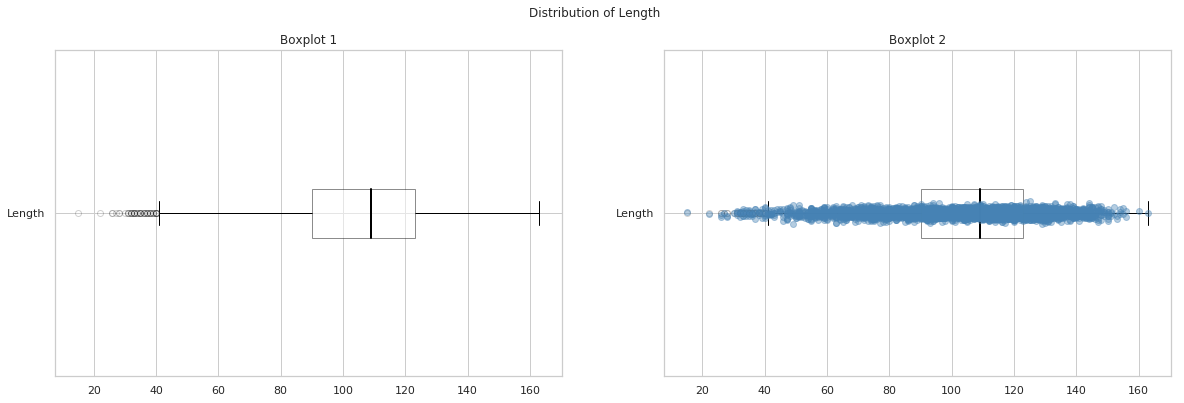

In [10]:
def restyle_boxplot(patch):
    # change color and linewidth of the whiskers
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    # change color and linewidth of the caps
    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    # change color and linewidth of the medians
    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    # change the style of fliers and their fill
    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)

    for box in patch["boxes"]:
        box.set(facecolor='#FFFFFF', alpha=0.5)

def numeric_boxplot(numeric_df, label, title):
    figure = plt.figure(figsize=(20, 6))
    # Add Main Title
    figure.suptitle(title)
    # Left side: Boxplot 1
    axes1 = figure.add_subplot(1, 2, 1)
    patch = axes1.boxplot(numeric_df, labels=[label], vert=False, showfliers = True, patch_artist=True, zorder=1)
    restyle_boxplot(patch)
    axes1.set_title('Boxplot 1')
    # Right side: Boxplot 2
    axes2 = figure.add_subplot(1, 2, 2)
    patch = axes2.boxplot(numeric_df, labels=[label], vert=False, patch_artist=True, zorder=1)
    restyle_boxplot(patch)
    axes2.set_title('Boxplot 2')
    y = np.random.normal(1, 0.01, size=len(numeric_df))
    axes2.plot(numeric_df, y, 'o', color='steelblue', alpha=0.4, zorder=2)
    plt.show()
    plt.close()

numeric_boxplot(df.length, 'Length', 'Distribution of Length')

From Boxplot 1, which is IQR * 1.5 tells us, outliers exist between ranges of 20 to 40 which presumably is due to Infants presence or particular small species of abalone. 

From Boxplot 2 we can see the distribution is indeed left skewed, and values are centered around 100-140 range.

Let's do a histogram to visualize the shape of the distribution, we can stick with default bin size for now.

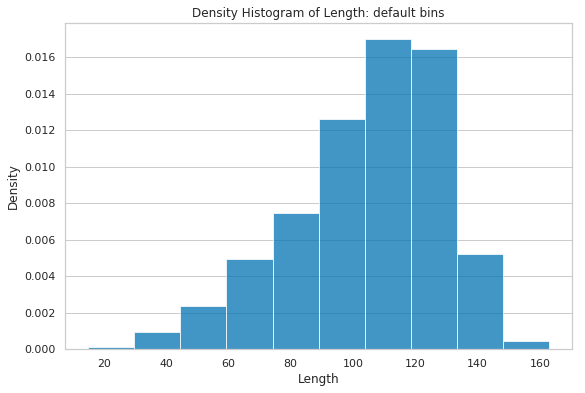

In [11]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 2)
axes.hist(df.length, density=True, alpha=0.75)
axes.set_title("Density Histogram of Length: default bins")
axes.set_ylabel("Density")
axes.set_xlabel("Length")
axes.xaxis.grid(False)
plt.show()
plt.close()

We can see a left skewed normal like shape, let's see if the distribution is good match with normal with QQ-plots.

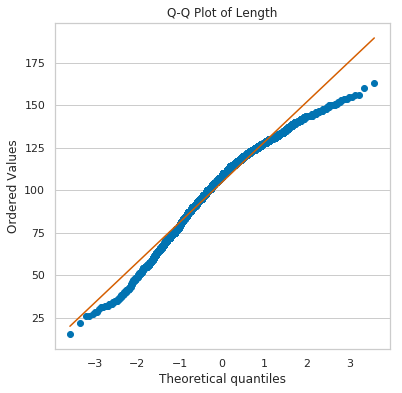

In [12]:
figure = plt.figure(figsize=(6, 6))
axes = figure.add_subplot(1, 1, 1)
stats.probplot(df.length, dist="norm", plot=axes)
axes.set(title="Q-Q Plot of Length")
axes.xaxis.grid(False)
plt.show()
plt.close()

Indeed, length closely follows a normal shape, and while we see deviation at the lowest value and highest length value, the difference would be better visualized with CDF, let's visualize the difference by contrasting CDF with the Difference plot.

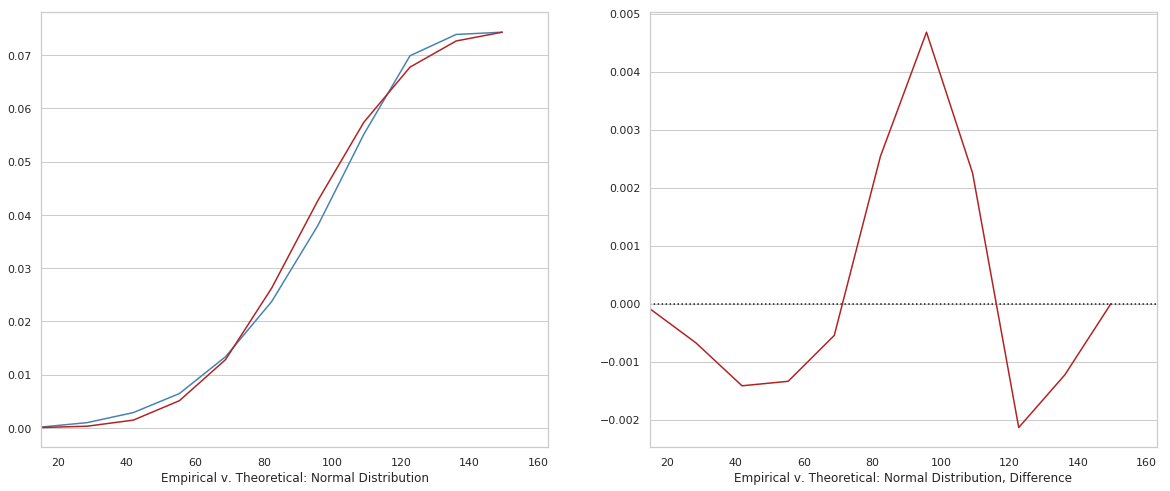

In [13]:
def cdf_plot(numeric_df):
    figure = plt.figure(figsize=(20, 8))

    mn = np.min(numeric_df)
    mx = np.max(numeric_df)
    mean = np.mean(numeric_df)
    std = np.std(numeric_df)

    axes = figure.add_subplot(1, 2, 1)

    values, base = np.histogram(numeric_df, bins=11, density=True)
    cumulative = np.cumsum(values)
    axes.plot(base[:-1], cumulative, color="steelblue")
    axes.set_xlim((mn, mx))

    sampled_data = [mean + r * std for r in np.random.standard_normal(10000)]
    values2, base = np.histogram(sampled_data, bins=base, density=True)
    cumulative2 = np.cumsum(values2)
    axes.plot( base[:-1], cumulative2, color="firebrick")
    axes.set_xlim((np.min(df.length), np.max(df.length)))
    axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution")
    axes.xaxis.grid(False)
    
    axes = figure.add_subplot(1, 2, 2)

    differences = cumulative2 - cumulative
    axes.plot(base[:-1], differences, color='firebrick')
    axes.set_xlim((mn, mx))
    axes.hlines(0, 0, 14000, linestyles="dotted")
    axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution, Difference")
    axes.xaxis.grid(False)
    plt.show()
    plt.close()
    
cdf_plot(df.length)

We can see values almost fit perfect and can be modeled with normal, but we need to be aware of the difference plot where we can see big difference near middle, beginning and tail regions.

### [Height](#Contents)

Again, we expect height to be normally distributed, and spread to be slightly skewed due to Infants in the dataset.

In [14]:
df.height.describe()

count    4177.000000
mean       27.903280
std         8.365398
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max       226.000000
Name: height, dtype: float64

We caught our first anomaly here, min value of height is 0, whether it is an error or not we can verify it by further looking into it, but it doesn't make sense for abalone no matter how small to have 0 height.

Another thing to notice is max is 226, which is really large compared to mean, 
both min and max are skewing our distribution, is it error in measurement, conversion error of different units, or missing value place holder.

Also, we can see mean is less than the median so again a left skewness is observed in the distribution.

In [15]:
df[df['height'] == 0]

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
1257,I,86.0,68.0,0.0,85.599998,41.299999,17.200001,23.000000,8
3996,I,63.0,46.0,0.0,26.799999,11.500000,5.700000,70.099998,6


First we notice is other variables have valid values, while whole weight and length tell us height shouldn't be 0. Another thing we notice is length and diameter are both smaller than their Q1, so height should also be around Q1, which is supported by the fact that sex is Infant. 

Overall we know it's not a data or measurement error as other values are valid, it might just be missing value, so we can either handle it by substituting mean or median if needed, but using kNN regression we can find similar infant abalones that match features close to this.

Now, let's explore the max 226 and see if it's corresponding variables lie above Q3, or it's also an anomaly in data.

In [16]:
df[df['height'] == 226]

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
2051,F,91.0,71.0,226.0,118.800003,66.400002,23.200001,26.700001,8


We can see it's a female abalone and other variables like length, diameter, weights, lie below Q3, so height is indeed an anomaly in this data set and would skew our distribution. Again we can do missing value imputation if needed.

Let's check the IQR to see how rest of the data lies within.

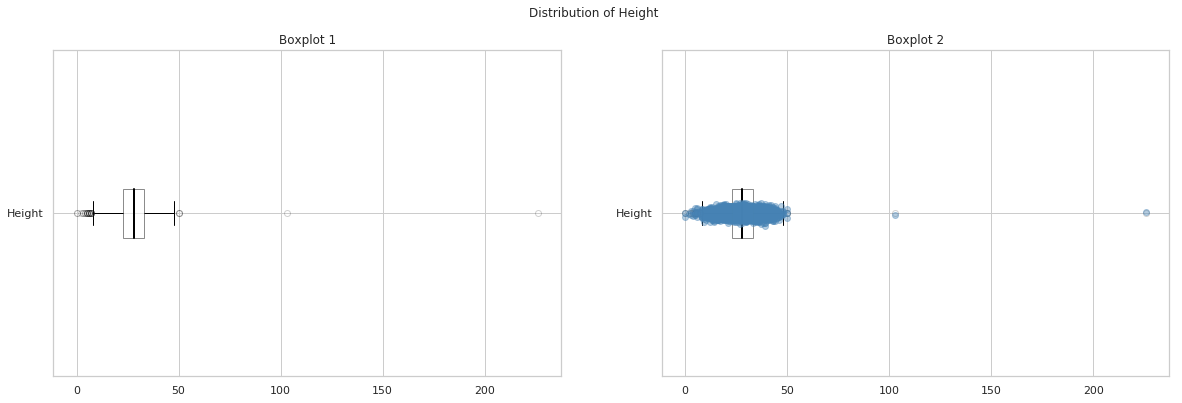

In [17]:
numeric_boxplot(df.height, 'Height', 'Distribution of Height')

We can see the max 226 giving right skewness, we would need to investigate the provenance of the data to understand where min and max anomaly come from.

### [Weights](#Contents)

We would expect from the four different weight measure that when adding up: 
Shell weight, Viscera weight, Shucked weight and some unknown mass of water/blood content lost from shucking process.

$$
whole\ weight = shell\ weight + viscera\ weight + shucked\ weight + lost\ unknown\ mass\ of\ water/blood
$$

We will analyze all the weights together as they are related to each other and should have similar statistics. 

Let's explore summary statistics first for all weight features:

In [18]:
df[['whole-weight', 'shucked-weight', 'viscera-weight', 'shell-weight']].describe()

,whole-weight,shucked-weight,viscera-weight,shell-weight
count,4177.000000,4177.000000,4177.000000,4177.000000
mean,165.748688,71.873466,36.118732,47.766129
std,98.077812,44.392590,21.922873,27.840549
min,0.400000,0.200000,0.100000,0.300000
25%,88.300003,37.200001,18.700001,26.000000
50%,159.899994,67.199997,34.200001,46.799999
75%,230.600006,100.400002,50.599998,65.800003
max,565.099976,297.600006,152.000000,201.000000


From above summary statistics we can see, each weight features have mean greater than the median, so we can expect a right skewness in the distribution unlike length, and diameter.

For all the whole weight, we can see the weight ranges from the lowest of around 0 grams to max being weighing around roughly 570 grams. 

Similar trend should be expected, and looks like weights have high variance, and this again goes back to what we stated before, as to how abalone are collection of small and large sizes, so we should expect varying weights between abalones. 

Now let's visualize the spread with a density histogram to see if it looks normal and has right skewness with adjusted bin size.

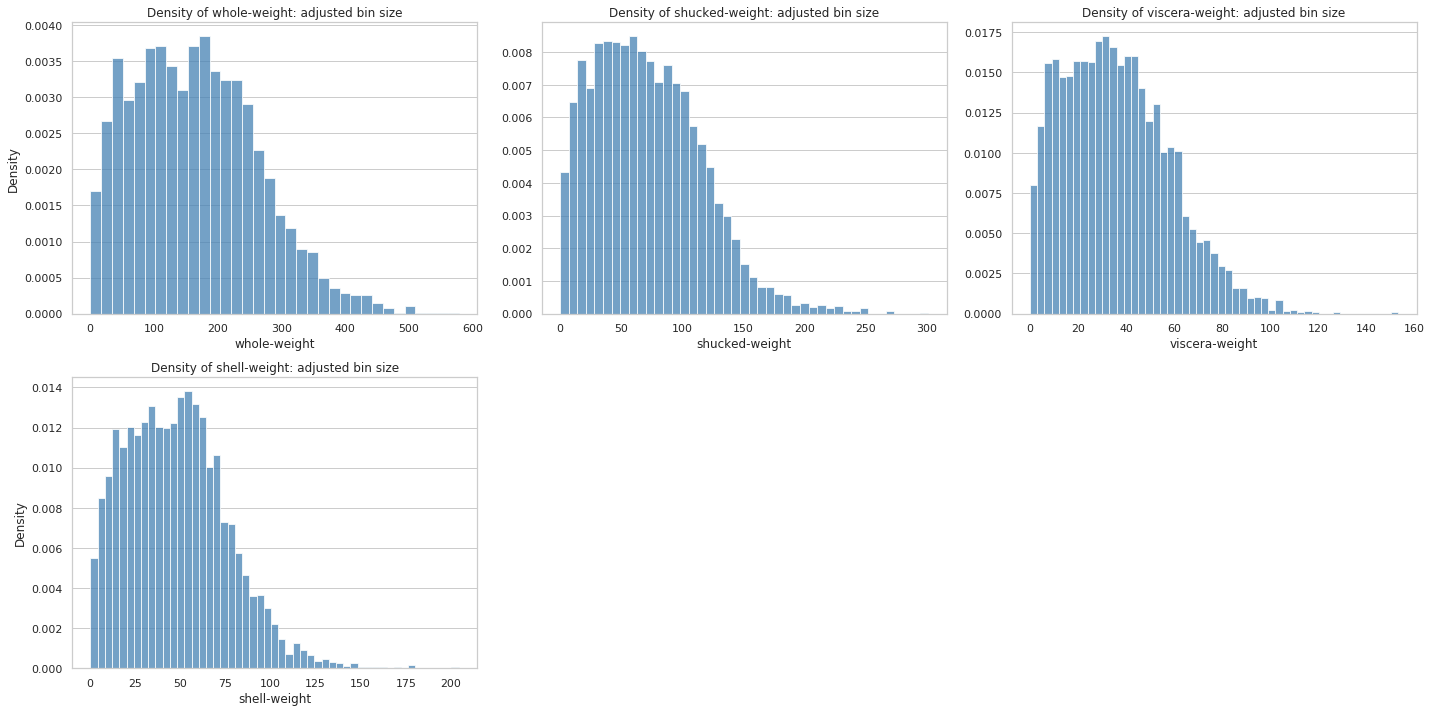

In [19]:
# I am trying out freeman diaconis rule to find optimal binwidth as it is less sensitive to outliers in data
# Reference: https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width
def freeman_diaconis(data):
    quartiles = stats.mstats.mquantiles(data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[0]
    n = len(data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int(h)

weights = ['whole-weight', 'shucked-weight', 'viscera-weight', 'shell-weight']
figure = plt.figure(figsize=(20, 10))
for i, k in enumerate(weights):
    axes = figure.add_subplot(2, 3, i + 1)
    subdata = df[k]
    binwidth = freeman_diaconis(subdata)
    bins = np.arange(min(subdata), max(subdata) + binwidth, binwidth)
    axes.hist(subdata, color="steelblue", bins=bins, density=True, alpha=0.75)
    axes.xaxis.grid(False)
    axes.set_title("Density of {}: adjusted bin size".format(k))
    if (i % 3 == 0):
        axes.set_ylabel("Density")
    axes.set_xlabel(k)
plt.tight_layout()

Indeed distribution is right skewed, and as we expected the histogram of shucked weight, shell weight and viscera weight are similar to whole weight and each other. 

We can now expect whole weight to be highly correlated with other weight variables, which doesn't help us much in predicting age.

Now we add new feature `weight-diff` to further understand if that is how whole weight is calculated, and see if their is anomaly in weight values, we expect weight diff to be vary between positive and zero as it was the mass that was lost during shucking process.

In [20]:
# Create weight-diff feature
df['weight-diff'] = df['whole-weight'] - (df['shell-weight'] + df['shucked-weight'] + df['viscera-weight'])
df['weight-diff'].describe()

count    4177.000000
mean        9.990033
std        11.614332
min       -89.499969
25%         3.599991
50%         7.399994
75%        13.600006
max       121.600006
Name: weight-diff, dtype: float64

Wow!, surprising weight difference is in negative for the min, does that mean it's an error in the process or measurement, we need to look at the values and see how many rows were negative in weight difference.

In [21]:
print("Number of weigh-diff observations that are negative:", len(df[df['weight-diff'] < 0]))
df[df['weight-diff'] < 0].head()

Number of weigh-diff observations that are negative: 154


,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings,weight-diff
42,I,48.0,35.0,9.0,14.000000,6.300000,4.700000,4.0,5,-1.000000
43,I,41.0,30.0,11.0,8.400000,5.100000,3.000000,2.4,5,-2.100000
44,I,42.0,30.0,10.0,8.400000,3.500000,2.500000,3.0,4,-0.600000
45,I,78.0,59.0,19.0,40.599998,17.500000,9.000000,15.0,7,-0.900002
46,M,94.0,74.0,24.0,115.900002,58.599998,45.400002,28.0,9,-16.099998


So, there are total of 153 observations that have weight difference in negative, we can ignore the values around 0 so $\pm 2$, but we can't ignore values that are range from -10 to -89.

Another thing to note is in above observations we can see each feature has distinct row, and values for weight differ mostly. 

Now let's see summary statistics of negative weight difference values, to see why combined weight is more than whole weight.

In [22]:
df[df['weight-diff'] < 0]['weight-diff'].describe()

count    1.540000e+02
mean    -8.929870e+00
std      1.699796e+01
min     -8.949997e+01
25%     -6.074999e+00
50%     -2.200001e+00
75%     -8.999983e-01
max     -4.768372e-07
Name: weight-diff, dtype: float64

We can see the mean is around -9, and median lies around -2, it's harder to infer the reasons we see above anomaly, as we don't know how the observations were collected or if their is error associated with shucking process or simply data entry error.

Let's visualize it with density plot to see the spread of the negative weight differences vs. positive differences, and get overall sense of weight differences.

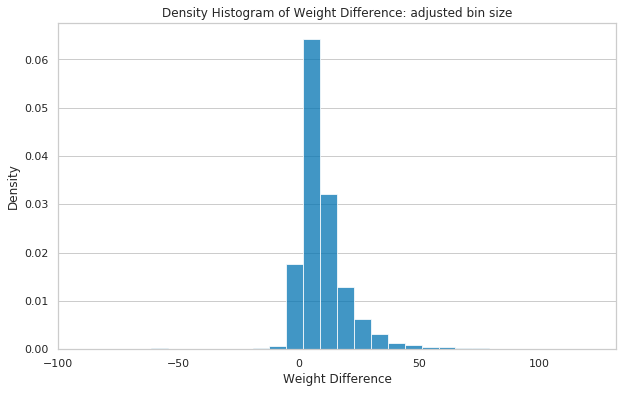

In [23]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df['weight-diff'], bins=30, density=True, alpha=0.75)
axes.set_ylabel("Density")
axes.set_xlabel("Weight Difference")
axes.set_title("Density Histogram of Weight Difference: adjusted bin size")
axes.xaxis.grid(False)
plt.show()

As you can see most values are positive while we can also observe anomalies of negative weight differences.

### [Rings](#Contents)

We kind of know rings is a predictor of age, so it is an integer values as they are counted as discrete quantity rather than continuous values, thus we should see discrete distributions with rings, and counts would be more appropriate for Y-axis to plot against.

Now let's start with summary statistics to see what the min and max number of rings are, and where the sample mean lies.

In [24]:
df.rings.describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: rings, dtype: float64

We can see most of the rings are within 8 and 10, while mean is around 10, and since mean is greater than median, the distribution would be right skewed. Sample variance is smaller, so distribution would be narrower, we can plot a density histogram to verify it.

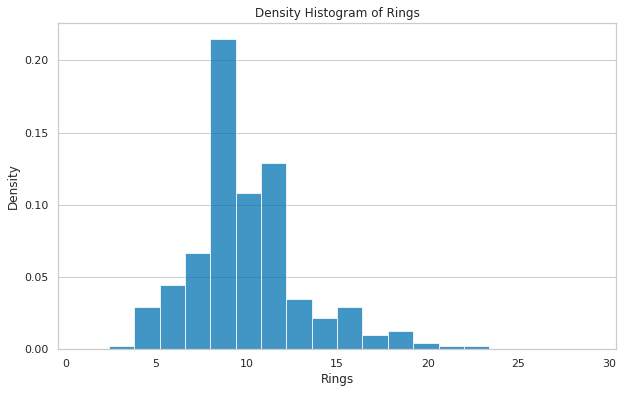

In [25]:
bins = np.arange(min(df.rings), max(df.rings) + binwidth, binwidth)
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(df.rings, bins=20, density=True, alpha=0.75)
axes.set_ylabel("Density")
axes.set_xlabel("Rings")
axes.set_title("Density Histogram of Rings")
axes.xaxis.grid(False)
plt.show()

Indeed, it is as we expected, distribution is right skewed and has less spread, with mean around 10, so the age of abalone would be around 11.5 years. 

## [Pairwise Analysis](#Contents)

Before we do pairwise let's see visualize the correlation coefficient matrix as a heat map to understand which pairwise analysis to check.

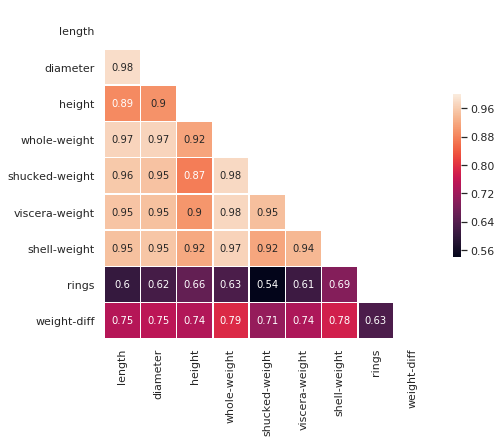

In [26]:
# Taken from the seaborn example at:
# http://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = df.corr('spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=1,square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
plt.show()
plt.close()

Note that many of the variables are highly correlated with one another with r > 0.7, we can expect the weights to be related to each other as we saw in univariate analysis, but it was unexpected to see the height to be also related with weights, and length and diameter.

We can ignore the other weight variables as they don't give us any new information that we know, we also expect know length, height and diameter to be linearly related, let's focus on:
* height vs. whole weight
* length vs. whole weight
* diameter vs. whole weight.

While there seems to be somewhat a weak correlation between rings and other variables.

#### Height vs. Whole weight

Before we compare Height vs. Whole weight, let's not forget that height has few anomalies that we expect to see if we plot a chart. We should expect to see those values around 0 and 226, another thing we should expect is somewhat linear monotonic relationship between them. 

Let's do a scatter plot to visualize it, we expect as height increase the whole weight should also add up, albeit we don't know if plot is linear or exponential. 

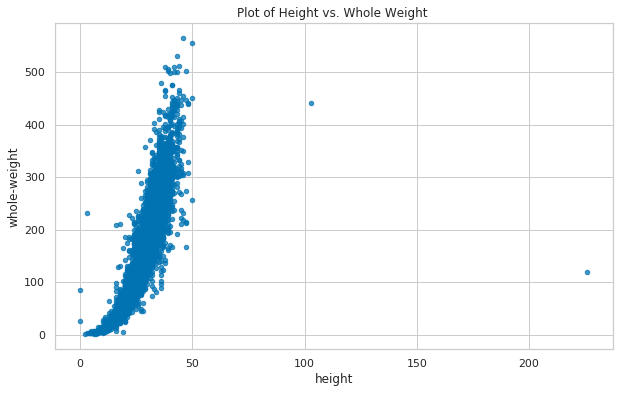

In [27]:
df.plot.scatter("height", "whole-weight", figsize=(10, 6),
                title="Plot of Height vs. Whole Weight ", alpha=0.75)
plt.show()
plt.close()

From above plot we can see somewhat a kind of exponential monotonic increasing relationship, so as height increases the whole weight increases for abalone which makes sense, while it doesn't make sense for 0 height to not increase when their weights are really high, or height is really large like 226 but weight is lower than we might expect. Another thing to notice is another outlier near 100 height, has also fairly large weight with it, unlike other outliers at height 0 and 226.


#### Length vs. Whole weight

We expect the weight of abalone to increase monotonically as it eats and adds new growth rings the shell length will increase so will weight due to increased shell size. Let's plot a loess line with a scatter plot, as we don't know if it is a linear or exponential. 

We can confirm based on this para from [Marinebio.net](https://www.marinebio.net/marinescience/06future/abrepro.htm):
> Abalone growth rings due to feeding are concentric rings laid down all along the edge of the shell. These circular banding patterns can be used as a clue to the types of food available to the abalone when it was young. As the abalone grows it adds new open holes in the area just to the left of its head, as needed. As a new hole is made the abalone will plug up an older hole, at the end of the line, that no longer is above the respiratory area. Each species of abalone has a range of open holes that can be found in each shell.




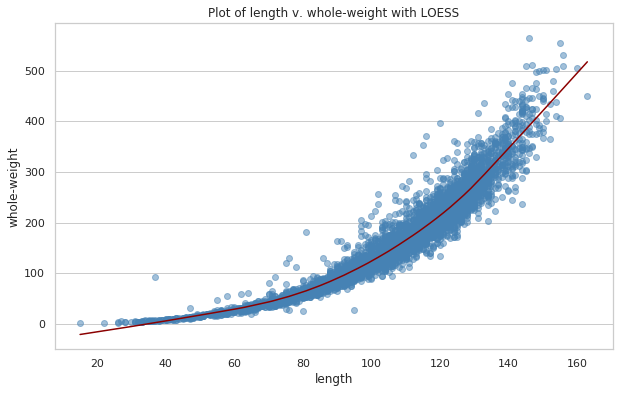

In [28]:
def lowess_scatter(data, x, y, jitter=0.0, skip_lowess=False):
    import statsmodels.api as sm
    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10)
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3)
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]

    figure = plt.figure(figsize=(10, 6))
    axes = figure.add_subplot(1, 1, 1)
    xs = data[x]
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs(0, 0.5, data[x].size)

    axes.scatter(xs, data[y], marker="o", color="steelblue", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")
    title = "Plot of {0} v. {1}".format(x, y)
    if not skip_lowess:
        title += " with LOESS"
    axes.set_title(title)
    axes.set_xlabel(x)
    axes.set_ylabel(y)
    axes.xaxis.grid(False)
    plt.show()
lowess_scatter(df, "length", "whole-weight")

We can see the plot kind of looks like exponential function with monotonically increasing relationship, and as expected as the weight increase we expect the length of shell to increase as abalone adds new growth rings to it's shell.

#### Diameter vs. Whole weight

Similar to length, since length and diameter are perpendicular to each other we expect diameter to also show exponential like curve and grow as abalone adds new growth rings.

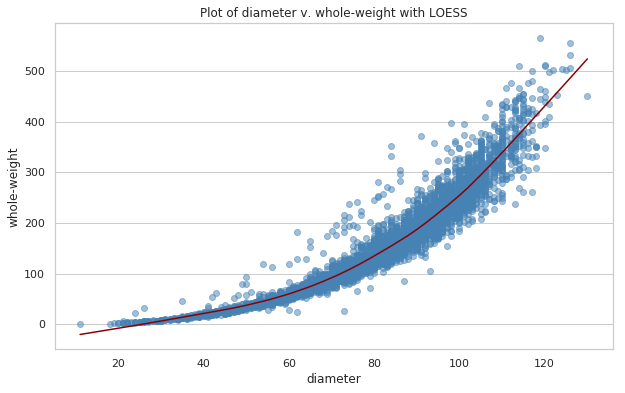

In [29]:
lowess_scatter(df, "diameter", "whole-weight")

Indeed, we see an exponential curve, similar to length vs. whole weight. 

Now, we need to explore the relationship between the predictor variable `rings vs. height, length, diameter and whole weight`, which we deem important as we expect as length, height, diameter and whole weight increase so should the rings as abalone grows in size, which also reflects its age. 

#### Whole weight vs. Rings
We don't expect to have a strong correlation with whole weights, as we know difference species of abalone have different sizes, so total weight won't tells us any thing much about rings. 

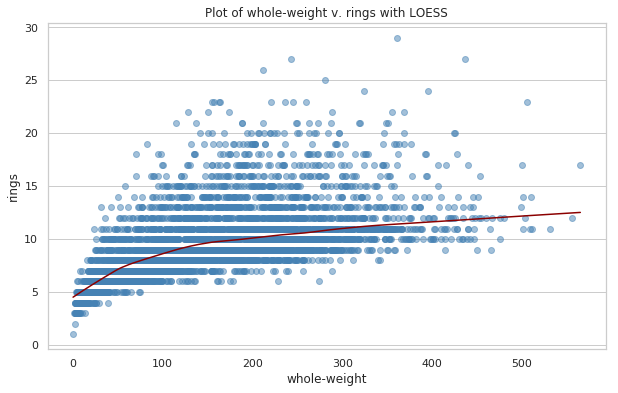

In [30]:
lowess_scatter(df, "whole-weight", "rings")

As we expected, rings have really weak correlation monotonic increasing relationship with whole weight, the shape of loess line somewhat represents logarithmic curve.

#### Length vs. Rings

We expect length, along with diameter and height to have high slightly higher correlation as increasing the ring size regardless of species increases their length, diameter and height as they add new growth rings to their shell. We can visualize it with LOESS line through a scatter plot.

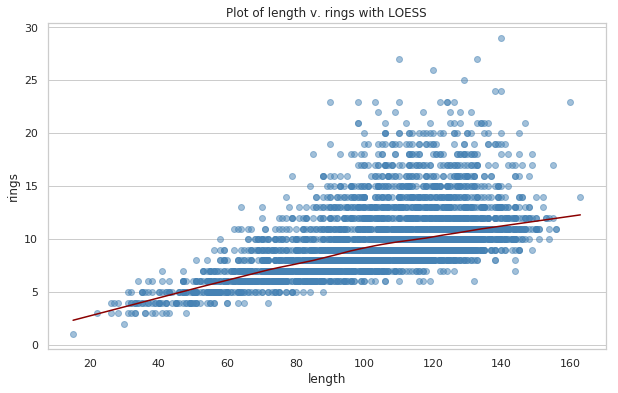

In [31]:
lowess_scatter(df, "length", "rings")

As we expected there is indeed presence of weak monotonically linear relation ship of rings with length. 

#### Diameter vs. Rings

As we stated above, we also expect diameter to also have weak linear monotonically increasing relationship with rings, which we can visualize it with scatter plot and loess line through it.

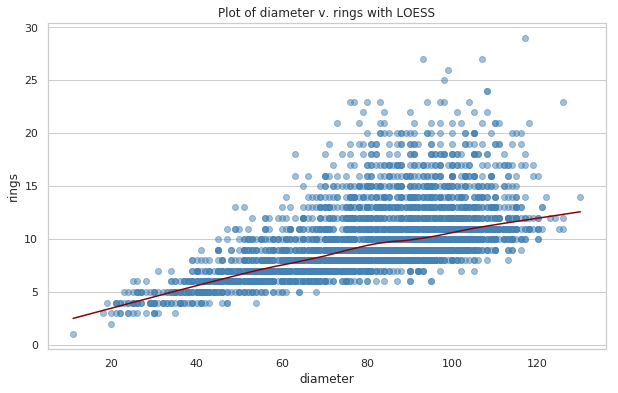

In [32]:
lowess_scatter(df, "diameter", "rings")

One thing that stands out in both, length and diameter plot is, it becomes increasing hard to predict for higher ring values above 15, so it seems sweet spot of predicting ring is between 5 and 15.

#### Height vs. Rings

We suspect height is also strongly correlated with rings as it did with whole weight, let's visualize it again with a scatter plot to see if that is so. 

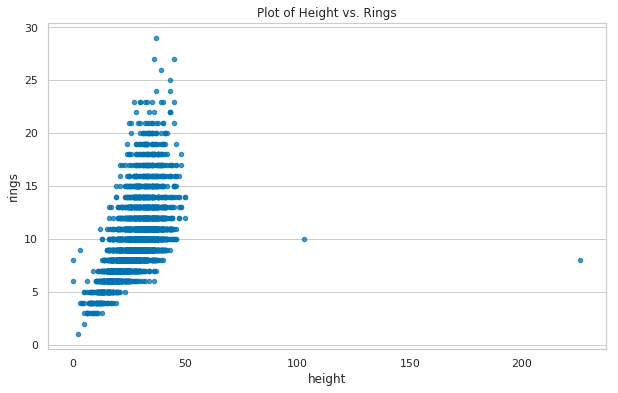

In [33]:
df.plot.scatter("height", "rings", figsize=(10, 6),
                title="Plot of Height vs. Rings", alpha=0.75)
axes = plt.gca()
axes.xaxis.grid(False)
plt.show()

Let's look at without outliers:

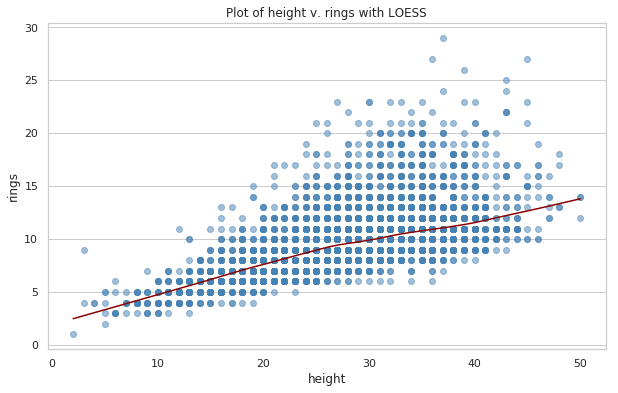

In [34]:
no_outlier_df = df[(df['height'] > 0) & (df['height'] < 100)]
lowess_scatter(no_outlier_df, "height", "rings")

Indeed we can see height is better suited to predict age of abalone vs. other measured variable, so far height is also one of the candidate we should look out for.

#### Rings vs. Shell weight

Now let's see why Shell weight has much higher correlation than height as we saw in the correlation coefficient matrix. We suspect that dried shell weight is much better indicator of abalone age since after drying we can approximate weight per ring.

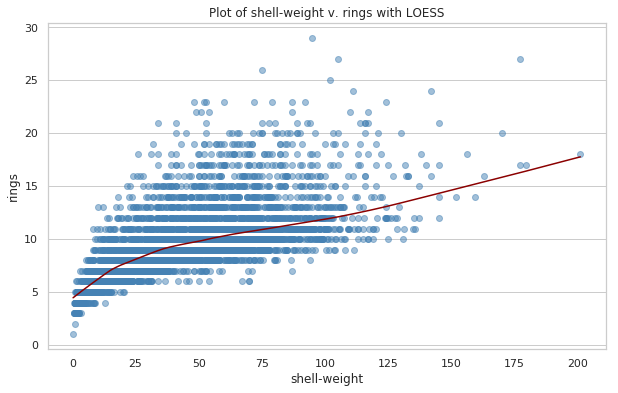

In [35]:
lowess_scatter(df, "shell-weight", "rings")

We can see a somewhat weak linear relationship but much better than preceding variables we explored. Another thing to notice is rings range between 5 to 15 would have better prediction accuracy which we saw applied to preceding distribution as well. 

#### PairPlots

Now let's do a pairplots to understand how `sex` affects the abalone features, and see if we can find that `infant` are overall smaller in dimension than `female` and `male` or not.

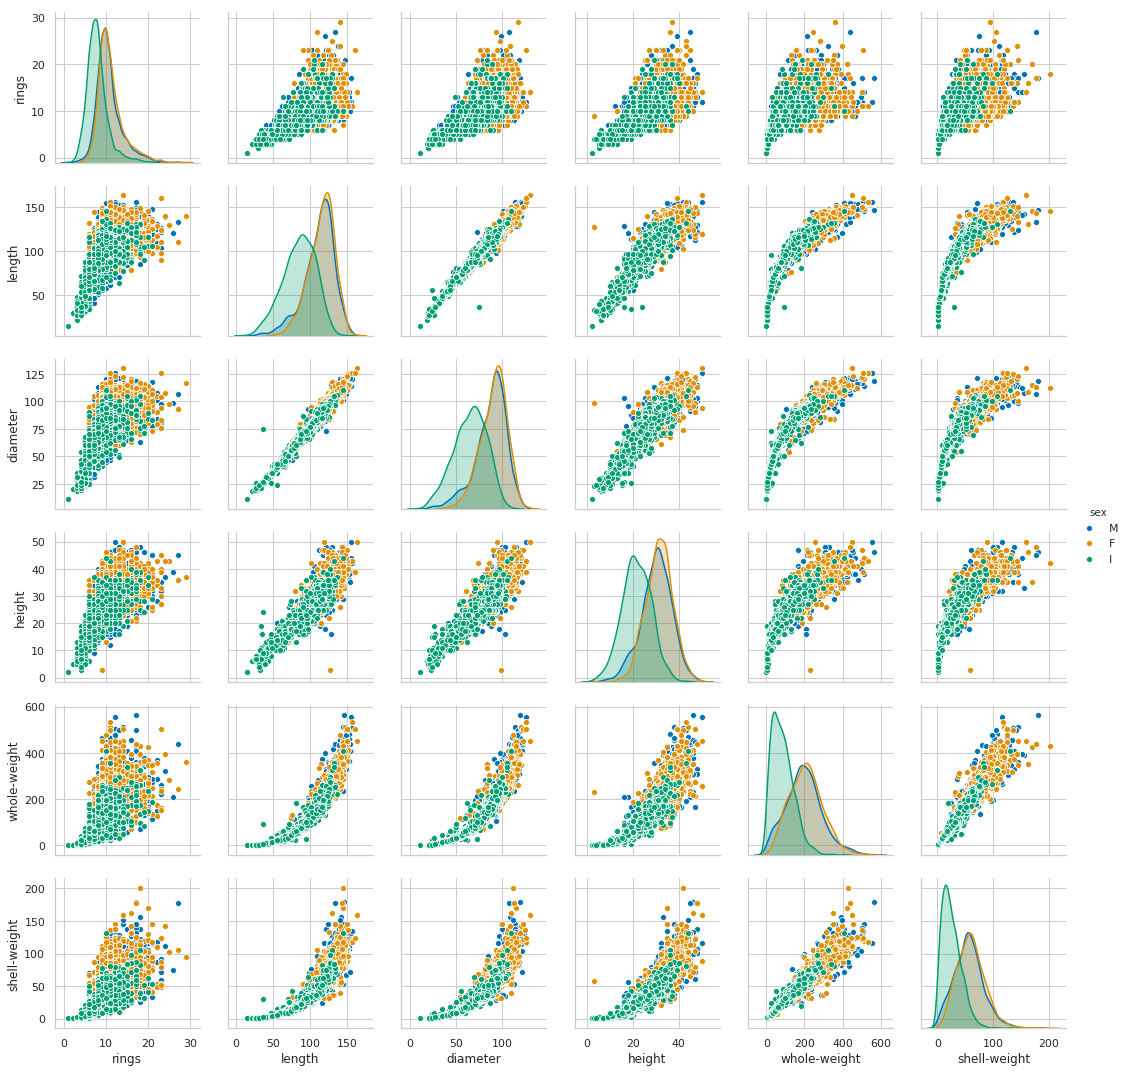

In [36]:
sns.pairplot(no_outlier_df, vars = ['rings', 'length', 'diameter', 'height', 'whole-weight', 'shell-weight'], hue='sex');

Clearly, there is a significant difference in dimensions depending on `sex`, we can see `infants < female <= male`, which tells us we can even classify between `infants` and `adult` abalones. 

## [Summary](#Contents)

* We can now be fairly certain that shell weight, and height are good predictors of age between 6.5 and 16.5, which we can model using linear regression.

* Also we need to be aware of `multicolinearity` within weight based features. 

* Another thing we noticed were anomalies in `height` and `weight-diff` variables, which we can remove as it would affect the model accuracy. 
